<a href="https://colab.research.google.com/github/fereshteh-bahadory/NewProject/blob/main/j_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patchify

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import some libraries

In [3]:
import numpy as np
import cv2
import os
import pathlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from pylab import imread,subplot,imshow

#import segmentation_models as sm 

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
from keras.utils.np_utils import to_categorical 
#Some preprocessing operation on images 
#BACKBONE = 'resnet34' 
#preprocess_input = sm.get_preprocessing(BACKBONE) 

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mscaler = MinMaxScaler()
sscaler = StandardScaler()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

To see what is in the data sets

(256, 256, 3)


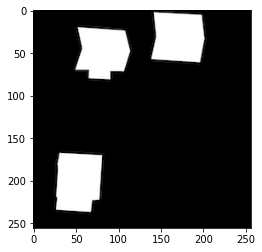

In [6]:
imcv2 = cv2.imread('/content/gdrive/MyDrive/j_project/train_labels/241.png')
print(imcv2.shape)
plt.imshow(imcv2, cmap='gray')

Text(0.5, 1.0, '>0.5')

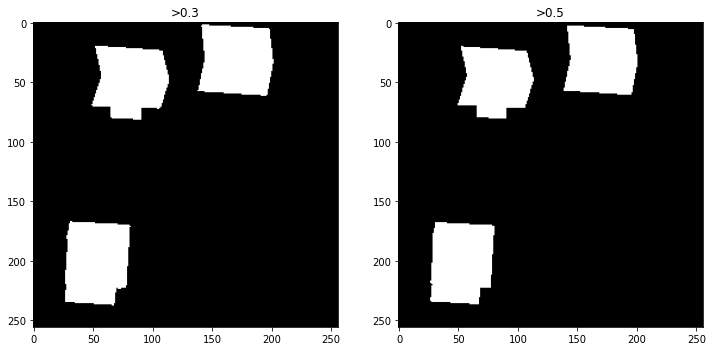

In [7]:
tmask = mpimg.imread('/content/gdrive/MyDrive/j_project/train_labels/241.png')
#print(np.nonzero(tmask), tmask.shape)
mat = np.zeros(tmask.size)
mat2 = np.zeros(tmask.size)
flat_msk = tmask.flatten()
for i in range(0,tmask.size):
  if flat_msk[i]>0.25:
    mat[i]=1
    #print(mat[i])
  else:
    mat[i]=0
mat_2=mat*255
mat_3 = mat_2.reshape(256,256)
for i in range(0,tmask.size):
  if flat_msk[i]>0.7:
    mat2[i]=1
    #print(mat[i])
  else:
    mat2[i]=0
mat2_2=mat2*255
mat2_reshape = mat2_2.reshape(256,256)
mat2_3= np.expand_dims(mat2_reshape, axis = 2)
mat2_3.shape
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(mat_3, cmap='gray')
plt.title('>0.3')
plt.subplot(122)
plt.imshow(mat2_reshape,cmap='gray')
plt.title('>0.5')

In [8]:
label_cv2 =cv2.imread('/content/gdrive/MyDrive/j_project/train_labels/241.png',cv2.IMREAD_GRAYSCALE)
label_cv2.shape
label_flatt = label_cv2.flatten()
label_3d = label_flatt.reshape(256,256,1)

In [9]:
directory = pathlib.Path('/content')
X = np.full((25,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(type(image_name))
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        #print(image_name)
        image = cv2.imread(path+"/"+image_name,3)
        iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        image = Image.fromarray(image)
        image=np.array(image)
        X[k]=image

In [10]:
directory = pathlib.Path('/content')
y_lb=np.full((25,256,256),0)
lb_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      if image_name.endswith(".png"):
        #print(image_name)
        lb_name.append(image_name)
        lb_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      if image_name.endswith(".png"):
        str_lb=str(image_name)
        l = lb_name.index(image_name)       
        label = cv2.imread(path+"/"+image_name,cv2.IMREAD_GRAYSCALE)
        #label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        #label = scaler.fit_transform(label.reshape(-1, label.shape[-1])).reshape(label.shape)
        label = Image.fromarray(label)
        label=np.array(label)
        #label = to_categorical(label)
        y_lb[l]=label

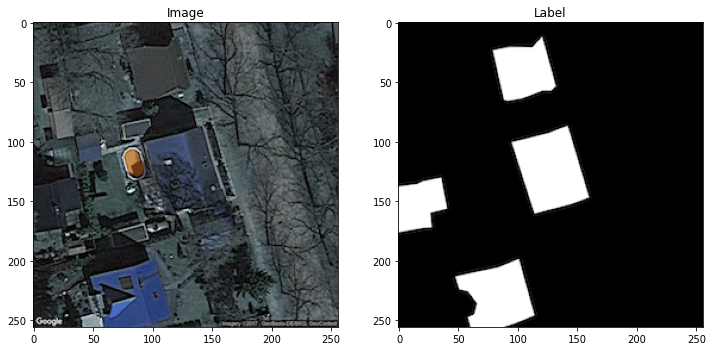

In [12]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(y_lb[t], cmap='gray')
plt.title('Label')
plt.show()

In [54]:
y_1 = np.full((25,256,256),0)
y = np.full((25,256,256,1),0)
matrix = np.full((25,256,256),0)
pmat = np.full((25,65536),0)
for i in range(0,24):
  mat = np.zeros(y_lb[i].size)
  flat_lb = y_lb[i].flatten()
  for j in range(0,y_lb[i].size):
    if flat_lb[j]>0.8:
      mat[j] = 1
    else:
      mat[j]=0
  mat2_2=mat2*255
  mat2_reshape = mat2_2.reshape(256,256)
  mat2_fin= np.expand_dims(mat2_reshape, axis = 2)
  pmat[i]=mat
  mat_reshape=mat.reshape(256,256)
  y[i]=mat2_fin
  matrix[i]=mat_reshape
for i in range(0,24):
  y[i]=np.expand_dims(matrix[i], axis = 2)

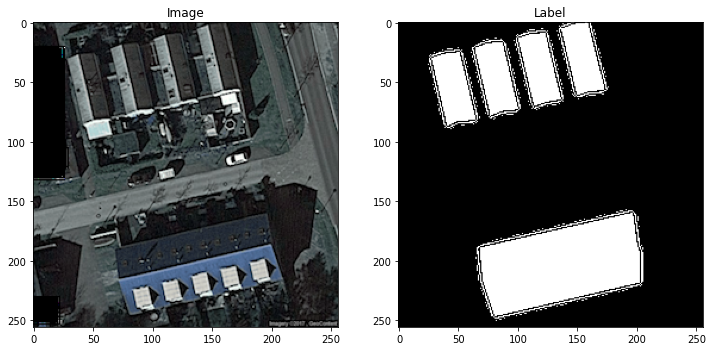

In [53]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(matrix[t], cmap='gray')
plt.title('Label')
plt.show()

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape,'\n',y_train.shape, '\n',X_test.shape, '\n', y_test.shape)

(20, 256, 256, 3) 
 (20, 256, 256, 1) 
 (5, 256, 256, 3) 
 (5, 256, 256, 1)


Defining model

In [49]:
model = models.Sequential()

model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu', input_shape =(256,256,3), name = 'Layer1'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer2'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer3'))

model.add(MaxPooling2D(pool_size = 2, name = 'MaxPooling_Layer1'))
model.add(Dropout(0.4, name = 'Dropout1'))

model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer4'))
model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer5'))
model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu', name = 'Layer6'))

model.add(MaxPooling2D(pool_size = 2, name = 'MaxPooling_Layer2'))
model.add(Dropout(0.4, name = 'Dropout2'))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(25, activation='relu', name = 'DenseLayer'))

model.add(Dense(65536, activation='sigmoid', name = 'OutputLayer'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 Layer2 (Conv2D)             (None, 252, 252, 64)      36928     
                                                                 
 Layer3 (Conv2D)             (None, 250, 250, 64)      36928     
                                                                 
 MaxPooling_Layer1 (MaxPooli  (None, 125, 125, 64)     0         
 ng2D)                                                           
                                                                 
 Dropout1 (Dropout)          (None, 125, 125, 64)      0         
                                                                 
 Layer4 (Conv2D)             (None, 123, 123, 32)      18464     
                                                      

In [47]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss',
                            mode = 'min',
                            min_delta = 0,
                            patience = 10,
                            restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Salinas_Model.h5', 
                             monitor = 'val_loss', 
                             mode ='min', 
                             save_best_only = True)

tensorboard = TensorBoard(log_dir=os.path.join('/content/gdrive/MyDrive/j_project/log', 'logs'))

hist = model.fit(X_train, 
                       y_train, 
                       epochs = 100, 
                       batch_size = 25 , 
                       validation_data = (X_test, y_test), 
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])
 


Epoch 1/100


ValueError: ignored